## Project pt.2
Matej Magat, 0036541718

### Packages

In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.display import display
pd.set_option('future.no_silent_downcasting', True)

### 1. Load data

In [3]:
df = pd.read_csv("heart_disease_uci.csv")
df.head(8)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0


### 2. Data overview

In [4]:
def describe_feature(df, feature):
   data_type = df.dtypes[feature]
   
   if data_type in ["int64", "float64"]:  # Numerical feature
       stats_df = pd.DataFrame({
           'Metric': ['Feature Name', 'Data Type', 'Minimum', 'Maximum', 'Mean', 'Median', 'Standard Deviation'],
           'Value': [
               feature,
               data_type,
               df[feature].min(),
               df[feature].max(), 
               df[feature].mean(),
               df[feature].median(),
               df[feature].std()
           ]
       })
       
   elif data_type == "object" or df[feature].nunique() < 10:  # Categorical feature
       # Get frequency distribution
       freq_dist = df[feature].value_counts()
       
       # Create initial stats
       base_stats = pd.DataFrame({
           'Metric': ['Feature Name', 'Data Type', 'Number of Unique Values', 'Most Frequent Value', 'Most Frequent Count'],
           'Value': [
               feature,
               data_type,
               df[feature].nunique(),
               freq_dist.index[0],
               freq_dist.values[0]
           ]
       })
       
       # Create frequency distribution stats
       freq_stats = pd.DataFrame({
           'Metric': [f'Frequency: {val}' for val in freq_dist.index],
           'Value': freq_dist.values
       })
       
       # Combine both DataFrames
       stats_df = pd.concat([base_stats, freq_stats], ignore_index=True)
       
   else:
       stats_df = pd.DataFrame({
           'Metric': ['Feature Name', 'Message'],
           'Value': [feature, f"Unsupported data type: {data_type}"]
       })
   
   return stats_df

In [5]:
features = df.columns.tolist()
number_of_features = len(features)
number_of_examples = len(df)
print(f"Dataset features: {features}")
print("Goal variable: num\n")
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {number_of_features}")
print(f"Number of examples: {number_of_examples}")

Dataset features: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
Goal variable: num

Dataset shape: (920, 16)
Number of features: 16
Number of examples: 920


#### 2.1 Description of each dataset feature

In [6]:
for feature in features:
    description = describe_feature(df, feature)
    display(description)

,Metric,Value
0,Feature Name,id
1,Data Type,int64
2,Minimum,1
3,Maximum,920
4,Mean,460.5
5,Median,460.5
6,Standard Deviation,265.725422


,Metric,Value
0,Feature Name,age
1,Data Type,int64
2,Minimum,28
3,Maximum,77
4,Mean,53.51087
5,Median,54.0
6,Standard Deviation,9.424685


,Metric,Value
0,Feature Name,sex
1,Data Type,object
2,Number of Unique Values,2
3,Most Frequent Value,Male
4,Most Frequent Count,726
5,Frequency: Male,726
6,Frequency: Female,194


,Metric,Value
0,Feature Name,dataset
1,Data Type,object
2,Number of Unique Values,4
3,Most Frequent Value,Cleveland
4,Most Frequent Count,304
5,Frequency: Cleveland,304
6,Frequency: Hungary,293
7,Frequency: VA Long Beach,200
8,Frequency: Switzerland,123


,Metric,Value
0,Feature Name,cp
1,Data Type,object
2,Number of Unique Values,4
3,Most Frequent Value,asymptomatic
4,Most Frequent Count,496
5,Frequency: asymptomatic,496
6,Frequency: non-anginal,204
7,Frequency: atypical angina,174
8,Frequency: typical angina,46


,Metric,Value
0,Feature Name,trestbps
1,Data Type,float64
2,Minimum,0.0
3,Maximum,200.0
4,Mean,132.132404
5,Median,130.0
6,Standard Deviation,19.06607


,Metric,Value
0,Feature Name,chol
1,Data Type,float64
2,Minimum,0.0
3,Maximum,603.0
4,Mean,199.130337
5,Median,223.0
6,Standard Deviation,110.78081


,Metric,Value
0,Feature Name,fbs
1,Data Type,object
2,Number of Unique Values,2
3,Most Frequent Value,False
4,Most Frequent Count,692
5,Frequency: False,692
6,Frequency: True,138


,Metric,Value
0,Feature Name,restecg
1,Data Type,object
2,Number of Unique Values,3
3,Most Frequent Value,normal
4,Most Frequent Count,551
5,Frequency: normal,551
6,Frequency: lv hypertrophy,188
7,Frequency: st-t abnormality,179


,Metric,Value
0,Feature Name,thalch
1,Data Type,float64
2,Minimum,60.0
3,Maximum,202.0
4,Mean,137.545665
5,Median,140.0
6,Standard Deviation,25.926276


,Metric,Value
0,Feature Name,exang
1,Data Type,object
2,Number of Unique Values,2
3,Most Frequent Value,False
4,Most Frequent Count,528
5,Frequency: False,528
6,Frequency: True,337


,Metric,Value
0,Feature Name,oldpeak
1,Data Type,float64
2,Minimum,-2.6
3,Maximum,6.2
4,Mean,0.878788
5,Median,0.5
6,Standard Deviation,1.091226


,Metric,Value
0,Feature Name,slope
1,Data Type,object
2,Number of Unique Values,3
3,Most Frequent Value,flat
4,Most Frequent Count,345
5,Frequency: flat,345
6,Frequency: upsloping,203
7,Frequency: downsloping,63


,Metric,Value
0,Feature Name,ca
1,Data Type,float64
2,Minimum,0.0
3,Maximum,3.0
4,Mean,0.676375
5,Median,0.0
6,Standard Deviation,0.935653


,Metric,Value
0,Feature Name,thal
1,Data Type,object
2,Number of Unique Values,3
3,Most Frequent Value,normal
4,Most Frequent Count,196
5,Frequency: normal,196
6,Frequency: reversable defect,192
7,Frequency: fixed defect,46


,Metric,Value
0,Feature Name,num
1,Data Type,int64
2,Minimum,0
3,Maximum,4
4,Mean,0.995652
5,Median,1.0
6,Standard Deviation,1.142693


#### 2.2 Visualizing feature distributions

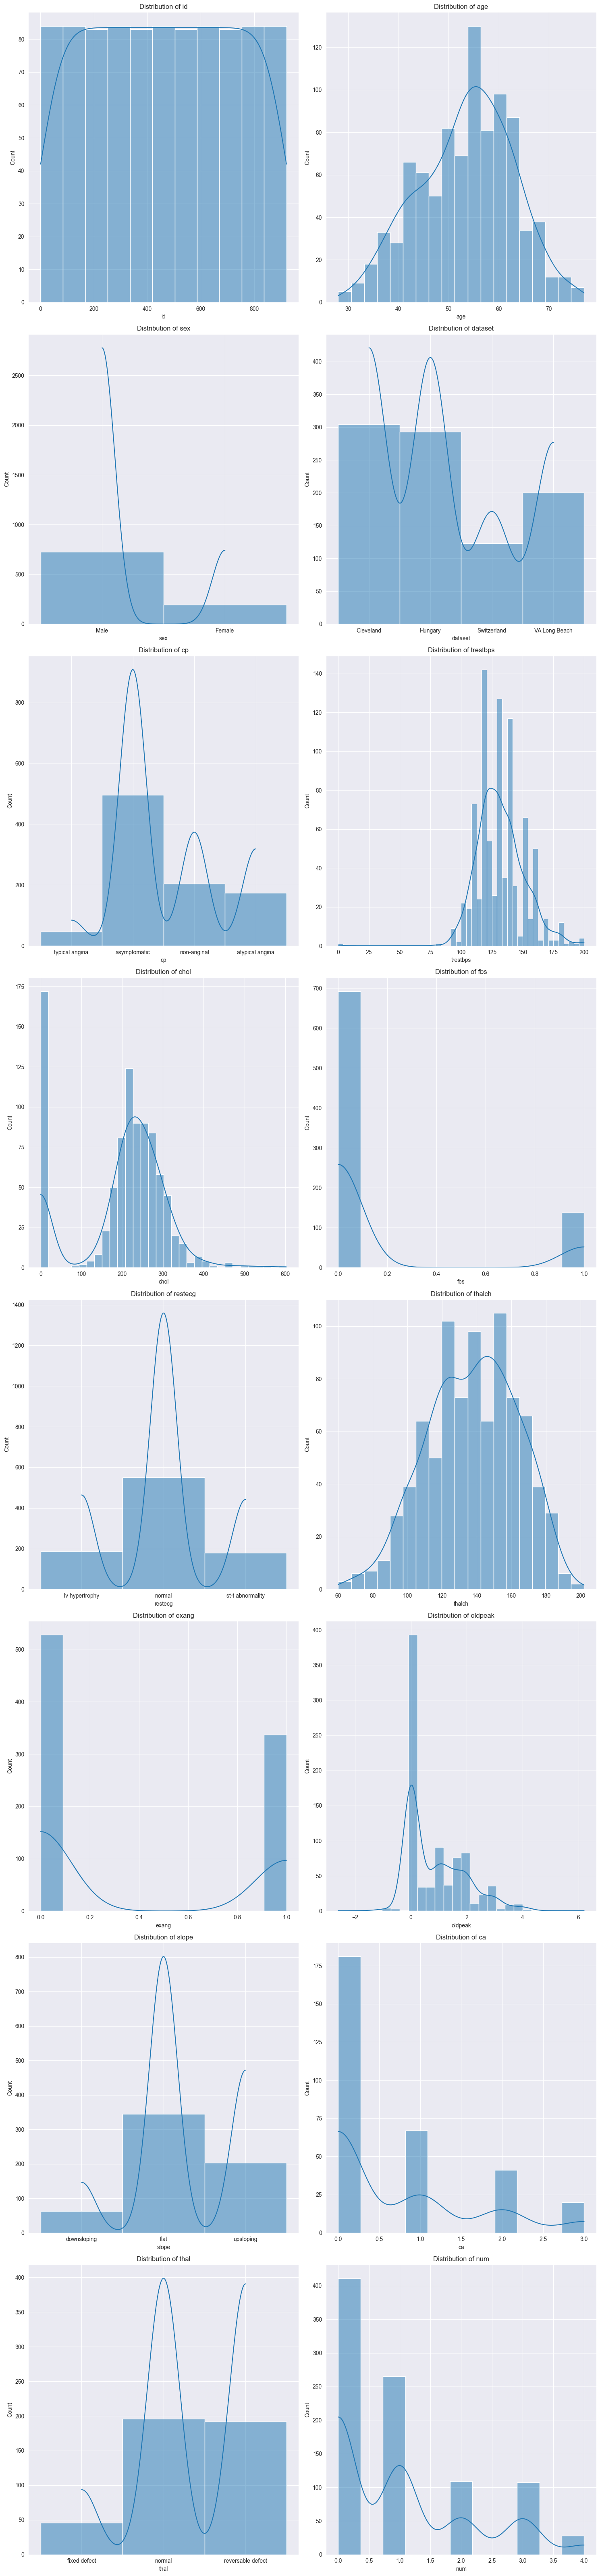

In [7]:
def plot_distribution(df, feature, ax=None):

   # If no axis is provided, create a new plot
    if ax is None:
        plt.figure(figsize=(8, 6))
        ax = sns.histplot(df[feature], kde=True)
        ax.set_title(f'Distribution of {feature}')
        plt.show()
    else:
        sns.histplot(df[feature], kde=True, ax=ax)
        ax.set_title(f'Distribution of {feature}')
       
def plot_distributions(df):
    features_list = df.columns.tolist()
    num_features = len(features_list)
    if num_features % 2 == 0:
        y = num_features // 2
    else:
        y = num_features // 2 + 1
    x = 2
    fig, axes = plt.subplots(y, x, figsize=(15, 4*num_features))
    
    for i in range(y):
        for j in range(x):
            ax = axes[i, j]
            if len(features_list) > 0:
                plot_distribution(df, features_list.pop(0), ax)
        
    plt.tight_layout()
    plt.show()

plot_distributions(df)

#### 2.3 Fixing column "chol"

Column "chol" has a lot of zeros, which probably represent empty entries

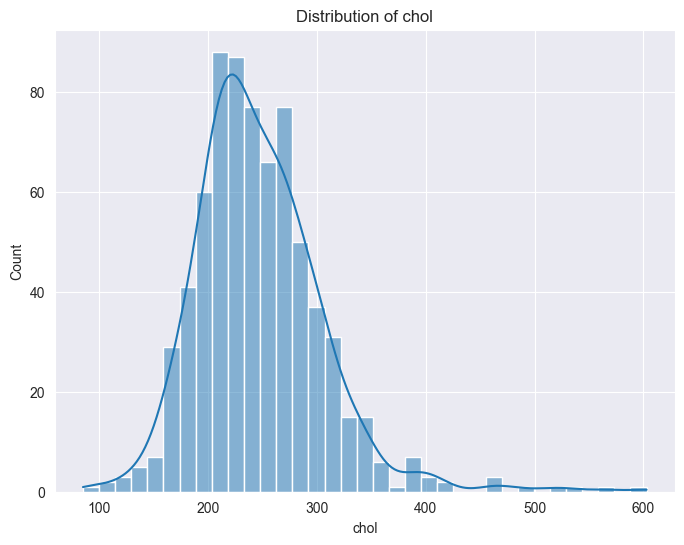

In [8]:
df["chol"] = df["chol"].replace(0, np.nan)
plot_distribution(df, feature="chol")

#### 2.4 Fixing column "oldpeak"
Column "oldpeak" has values < 0, which are not allowed and are probably a mistake

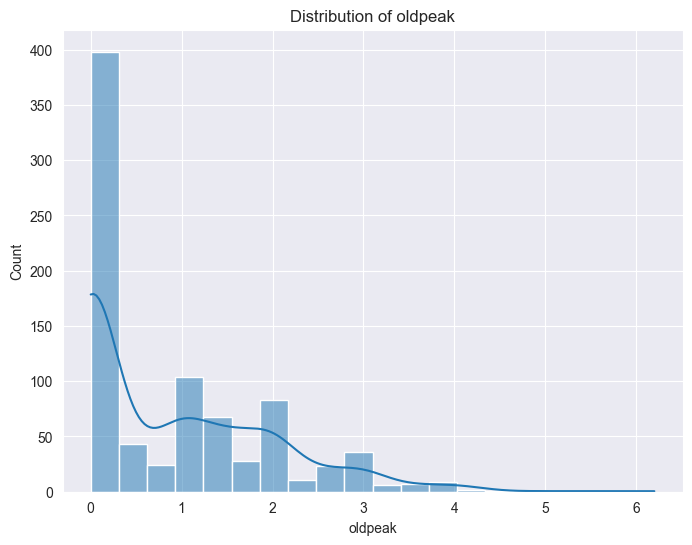

In [9]:
df["oldpeak"] = df["oldpeak"].apply(lambda x: np.nan if x < 0 else x)
plot_distribution(df, feature="oldpeak")

#### 2.5 Fixing column "trestbps"
It has some values that equal zero, which should not be possible

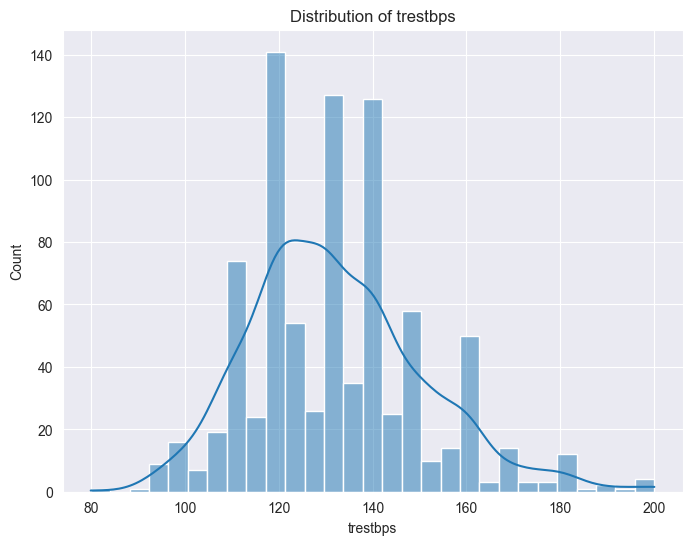

In [10]:
df["trestbps"] = df["trestbps"].replace(0, np.nan)
plot_distribution(df, feature="trestbps")

#### 2.6 Testing distributions of numeric columns

In [11]:
def test_distributions(df):
   numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
   results = []
   
   for column in numeric_columns:
       data = df[column].dropna()
       
       skewness = sp.stats.skew(data)
       kurtosis = sp.stats.kurtosis(data)
       
       k2_statistic, p_value = sp.stats.normaltest(data)
       is_normal = p_value > 0.05
       
       result = {
           "Feature": column,
           "Skewness": round(skewness, 3),
           "Kurtosis": round(kurtosis, 3),
           "K2_Statistic": round(k2_statistic, 3),
           "P_Value": round(p_value, 3),
           "Is_Normal": is_normal
       }
       results.append(result)
   
   results_df = pd.DataFrame(results)
   
   return results_df

In [12]:
test_distributions(df)

,Feature,Skewness,Kurtosis,K2_Statistic,P_Value,Is_Normal
0,id,0.000,-1.200,667.522,0.000,False
1,age,-0.196,-0.387,14.241,0.001,False
2,trestbps,0.629,0.620,58.306,0.000,False
3,chol,1.312,4.731,211.952,0.000,False
4,thalch,-0.211,-0.484,20.654,0.000,False
5,oldpeak,1.154,1.083,146.604,0.000,False
6,ca,1.160,0.177,49.144,0.000,False
7,num,0.967,-0.110,106.127,0.000,False


### 3. Cleaning data

#### 3.1 Remove unimportant features

In [13]:
df.drop("dataset", axis=1, inplace=True)

#### 3.2 Remove constant and monotone features

In [14]:
const_columns = [column for column in df if df[column].nunique() == 1]
df.drop(const_columns, axis=1, inplace=True)

monotonous_columns = [column for column in df if df[column].is_monotonic_decreasing or df[column].is_monotonic_increasing]
df.drop(monotonous_columns, axis=1, inplace=True)

if const_columns:
    print(f"Dropped constant columns: {const_columns}")
else:
    print("There are no constant columns")
    
if monotonous_columns:
    print(f"Dropped monotonous columns: {monotonous_columns}")
else:
    print("There are no monotonous columns")

There are no constant columns
Dropped monotonous columns: ['id']


#### 3.3 (SKIPPED) Removing outliers

#### 3.4 Handling missing values

##### 3.4.1 Detecting rows with missing values

In [15]:
missing_percentages = (df.isna().sum(axis=1) / len(df.columns)) * 100
print(f"Missing percentages:\n {missing_percentages}")
threshold = 0.5
df = df.dropna(thresh=(1 - threshold) * len(df.columns))
print(f"Dataset length after removing rows with >{threshold * 100}% missing values: {len(df)}")
number_of_examples = len(df)

Missing percentages:
 0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
915    21.428571
916    50.000000
917    14.285714
918    50.000000
919    21.428571
Length: 920, dtype: float64
Dataset length after removing rows with >50.0% missing values: 909


##### 3.4.2 Detecting columns with missing values

In [16]:
print(f"Of {number_of_examples} values: ")
columns_to_fill = []
columns_to_remove = []

threshold = 50

missing_percentages = []
for feature in df.columns:
    number_of_missing = df[feature].isnull().sum()
    percentage_missing = number_of_missing / number_of_examples * 100
    if percentage_missing > 0 and percentage_missing < threshold:
        columns_to_fill.append(feature)
    elif percentage_missing >= threshold:
        columns_to_remove.append(feature)
    missing_percentages.append(percentage_missing)
    # print(f"   Feature: {feature}, missing values: {percentage_missing:.2f}%")

summary_df = pd.DataFrame({"Features": df.columns, "Missing Percentage": missing_percentages})
display(summary_df)
print(f"columns_to_fill: {columns_to_fill}")
print(f"columns_to_remove: {columns_to_remove}")

Of 909 values: 


,Features,Missing Percentage
0,age,0.000000
1,sex,0.000000
2,cp,0.000000
3,trestbps,5.390539
4,chol,21.012101
5,fbs,9.900990
6,restecg,0.220022
7,thalch,4.840484
8,exang,4.840484
9,oldpeak,6.930693


columns_to_fill: ['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope']
columns_to_remove: ['ca', 'thal']


In [17]:
for column in columns_to_remove:
    df.drop(column, axis=1, inplace=True)
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2


##### 3.4.3 Imputing missing values

In [18]:
def impute_data(df):
    ds_copy = df.copy()
    
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    for column in df.columns:
        if df[column].isna().sum() == 0:
            continue
            
        if column in categorical_columns:
            # Categorical columns - use mode
            impute_value = df[column].mode()[0]
            print(f"Mode imputation for {column} (categorical)")
            ds_copy[column] = ds_copy[column].fillna(impute_value)
        
        # Check column type
        elif pd.api.types.is_numeric_dtype(df[column]):
            non_null_data = df[column].dropna()
            k2_statistic, p_value = sp.stats.normaltest(non_null_data)
            is_normal = p_value > 0.05
            
            if not is_normal:
                # non normal data - use median
                impute_value = df[column].median()
                print(f"Median imputation for {column} (not normal, p-value: {p_value:.5f})")
            else:
                # normal data - use mean
                impute_value = df[column].mean()
                print(f"Mean imputation for {column} (normal, p-value: {p_value:.5f})")
            
            ds_copy[column] = ds_copy[column].fillna(impute_value)
    
    return ds_copy

In [19]:
print("Missing values before imputation:")
display(df.isna().sum())

df = impute_data(df)

print("\nMissing values after imputation:")
display(df.isna().sum())

Missing values before imputation:


age           0
sex           0
cp            0
trestbps     49
chol        191
fbs          90
restecg       2
thalch       44
exang        44
oldpeak      63
slope       298
num           0
dtype: int64

Median imputation for trestbps (not normal, p-value: 0.00000)
Median imputation for chol (not normal, p-value: 0.00000)
Mode imputation for fbs (categorical)
Mode imputation for restecg (categorical)
Median imputation for thalch (not normal, p-value: 0.00003)
Mode imputation for exang (categorical)
Median imputation for oldpeak (not normal, p-value: 0.00000)
Mode imputation for slope (categorical)

Missing values after imputation:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

### 4. Normalization

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def normalize(df):
    df_normalized = df.copy()
    
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    normalization_info = {}
    
    for column in numeric_columns:
        data = df[column].dropna()
        
        k2_statistic, p_value = sp.stats.normaltest(data)
        is_normal = p_value > 0.05
        
        # Determine normalization method
        if is_normal:
            # For normally distributed data
            scaler = StandardScaler()
            normalized_data = scaler.fit_transform(data.values.reshape(-1, 1)).flatten()
            method = 'Standard (Z-score)'
        else:
            scaler = MinMaxScaler()
            normalized_data = scaler.fit_transform(data.values.reshape(-1, 1)).flatten()
            method = 'MinMax'
        
        df_normalized[column] = normalized_data
        normalization_info[column] = {
            'method': method,
            'is_normal': is_normal,
            'p_value': p_value
        }
    
    print("Feature Normalization Details:")
    for column, info in normalization_info.items():
        print(f"\n{column}:")
        print(f"  Normalization Method: {info['method']}")
        print(f"  Normally Distributed: {info['is_normal']}")
        print(f"  p-value: {info['p_value']:.4f}")
    
    return df_normalized, normalization_info

In [21]:
df, norm_info = normalize(df)

Feature Normalization Details:

age:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0009

trestbps:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000

chol:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000

thalch:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0007

oldpeak:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000

num:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000


### 5. Encoding categorical columns

In [22]:
from sklearn.preprocessing import LabelEncoder

def encode_features(df, label_encode_cols, onehot_encode_cols):
    df_encoded = df.copy()
    encoding_info = {}
    
    # Label Encoding
    for col in label_encode_cols:
        if col in df.columns:
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df[col].astype(str))
            encoding_info[col] = {
                'type': 'label',
                'classes': dict(enumerate(le.classes_)),
                'original_dtype': df[col].dtype
            }
    
    # One-Hot Encoding
    for col in onehot_encode_cols:
        if col in df.columns:
            # Create dummy variables
            dummies = pd.get_dummies(df[col], prefix=col)
            # Add dummy columns to the DataFrame
            df_encoded = pd.concat([df_encoded, dummies], axis=1)
            # Drop the original column
            df_encoded.drop(col, axis=1, inplace=True)
            # Store encoding information
            encoding_info[col] = {
                'type': 'onehot',
                'categories': list(dummies.columns),
                'original_dtype': df[col].dtype
            }
    
    return df_encoded, encoding_info

label_encode = ['sex', 'restecg', 'fbs', 'exang', 'dataset', 'thal']
one_hot_encode = ['slope', 'cp']

encoded_df, encoding_info = encode_features(df, label_encode, one_hot_encode)

encoding_summary = []
for col, info in encoding_info.items():
    if info['type'] == 'label':
        for code, category in info['classes'].items():
            encoding_summary.append({
                'Column': col,
                'Encoding_Type': 'Label',
                'Original_Value': category,
                'Encoded_Value': code
            })
    else:  # one-hot
        encoding_summary.append({
            'Column': col,
            'Encoding_Type': 'One-Hot',
            'Original_Value': 'N/A',
            'Encoded_Value': f"Split into columns: {', '.join(info['categories'])}"
        })

df = encoded_df
encoding_summary_df = pd.DataFrame(encoding_summary)
display(encoding_summary_df)

,Column,Encoding_Type,Original_Value,Encoded_Value
0,sex,Label,Female,0
1,sex,Label,Male,1
2,restecg,Label,lv hypertrophy,0
3,restecg,Label,normal,1
4,restecg,Label,st-t abnormality,2
5,fbs,Label,False,0
6,fbs,Label,True,1
7,exang,Label,False,0
8,exang,Label,True,1
9,slope,One-Hot,N/A,"Split into columns: slope_downsloping, slope_f..."


### 6. Final overview

#### 6.1 Dimensions of the cleaned dataset

In [23]:
categorical_columns = ["sex", "restecg", "fbs", "exang", 'slope_downsloping', 'slope_flat', 'slope_upsloping', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']
numeric_columns = [col for col in df.columns if col not in categorical_columns]

print(f"Dataset dimensions: {df.shape}")
print(f"Numerical columns: {len(numeric_columns)}")
print(numeric_columns)
print(f"Categorical columns: {len(categorical_columns)}")
print(categorical_columns)
print(f"Goal variable: num")
df.head(8)

Dataset dimensions: (909, 17)
Numerical columns: 6
['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']
Categorical columns: 11
['sex', 'restecg', 'fbs', 'exang', 'slope_downsloping', 'slope_flat', 'slope_upsloping', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']
Goal variable: num


,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,slope_downsloping,slope_flat,slope_upsloping,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,0.714286,1,0.541667,0.285714,1,0,0.633803,0,0.370968,0.00,True,False,False,False,False,False,True
1,0.795918,1,0.666667,0.388031,0,0,0.338028,1,0.241935,0.50,False,True,False,True,False,False,False
2,0.795918,1,0.333333,0.277992,0,0,0.485915,1,0.419355,0.25,False,True,False,True,False,False,False
3,0.183673,1,0.416667,0.318533,0,1,0.894366,0,0.564516,0.00,True,False,False,False,False,True,False
4,0.265306,0,0.416667,0.229730,0,0,0.788732,0,0.225806,0.00,False,False,True,False,True,False,False
5,0.571429,1,0.333333,0.291506,0,1,0.830986,0,0.129032,0.00,False,False,True,False,True,False,False
6,0.693878,0,0.500000,0.353282,0,0,0.704225,0,0.580645,0.75,True,False,False,True,False,False,False
7,0.591837,0,0.333333,0.519305,0,1,0.725352,1,0.096774,0.00,False,False,True,True,False,False,False


#### 6.2 Encoding info

In [24]:
display(encoding_summary_df)

,Column,Encoding_Type,Original_Value,Encoded_Value
0,sex,Label,Female,0
1,sex,Label,Male,1
2,restecg,Label,lv hypertrophy,0
3,restecg,Label,normal,1
4,restecg,Label,st-t abnormality,2
5,fbs,Label,False,0
6,fbs,Label,True,1
7,exang,Label,False,0
8,exang,Label,True,1
9,slope,One-Hot,N/A,"Split into columns: slope_downsloping, slope_f..."


#### 6.3 Normalization info

In [25]:
print("Feature Normalization Details:")
for column, info in norm_info.items():
    print(f"\n{column}:")
    print(f"  Normalization Method: {info['method']}")
    print(f"  Normally Distributed: {info['is_normal']}")
    print(f"  p-value: {info['p_value']:.4f}")

Feature Normalization Details:

age:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0009

trestbps:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000

chol:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000

thalch:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0007

oldpeak:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000

num:
  Normalization Method: MinMax
  Normally Distributed: False
  p-value: 0.0000


#### 6.4 Feature distributions

In [26]:
for column in numeric_columns:
        data = df[column]
        
        skewness = sp.stats.skew(data.dropna())
        kurtosis = sp.stats.kurtosis(data.dropna())
        
        k2_statistic, p_value = sp.stats.normaltest(data.dropna())
        is_normal = p_value > 0.05
        print(f"Column: {column}")
        print(f"Skewness: {skewness:.3f}")
        print(f"Kurtosis: {kurtosis:.3f}")
        print(f"D'Agostino-Pearson K^2 statistic: {k2_statistic:.3f}")
        print(f"P-Value: {p_value:.3f}, is normal: {is_normal}")
        print()

Column: age
Skewness: -0.191
Kurtosis: -0.392
D'Agostino-Pearson K^2 statistic: 14.062
P-Value: 0.001, is normal: False

Column: trestbps
Skewness: 0.666
Kurtosis: 0.838
D'Agostino-Pearson K^2 statistic: 72.262
P-Value: 0.000, is normal: False

Column: chol
Skewness: 1.557
Kurtosis: 6.903
D'Agostino-Pearson K^2 statistic: 339.016
P-Value: 0.000, is normal: False

Column: thalch
Skewness: -0.230
Kurtosis: -0.354
D'Agostino-Pearson K^2 statistic: 14.496
P-Value: 0.001, is normal: False

Column: oldpeak
Skewness: 1.256
Kurtosis: 1.434
D'Agostino-Pearson K^2 statistic: 183.661
P-Value: 0.000, is normal: False

Column: num
Skewness: 0.973
Kurtosis: -0.103
D'Agostino-Pearson K^2 statistic: 105.705
P-Value: 0.000, is normal: False



##### 6.4.1 Visualization of the distributions

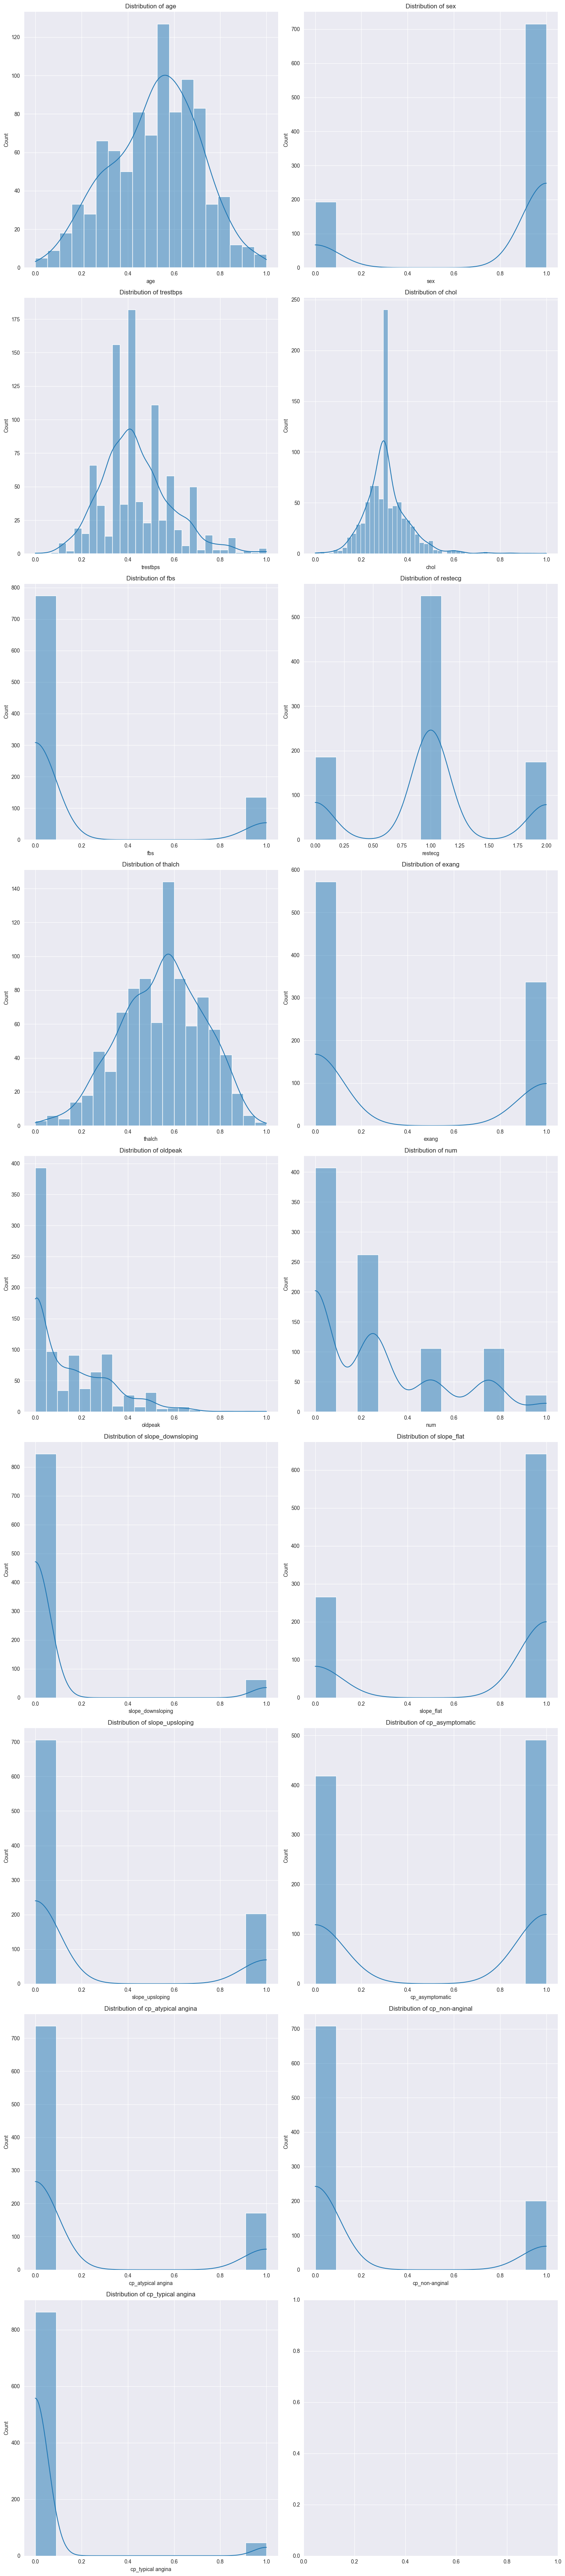

In [27]:
plot_distributions(df)

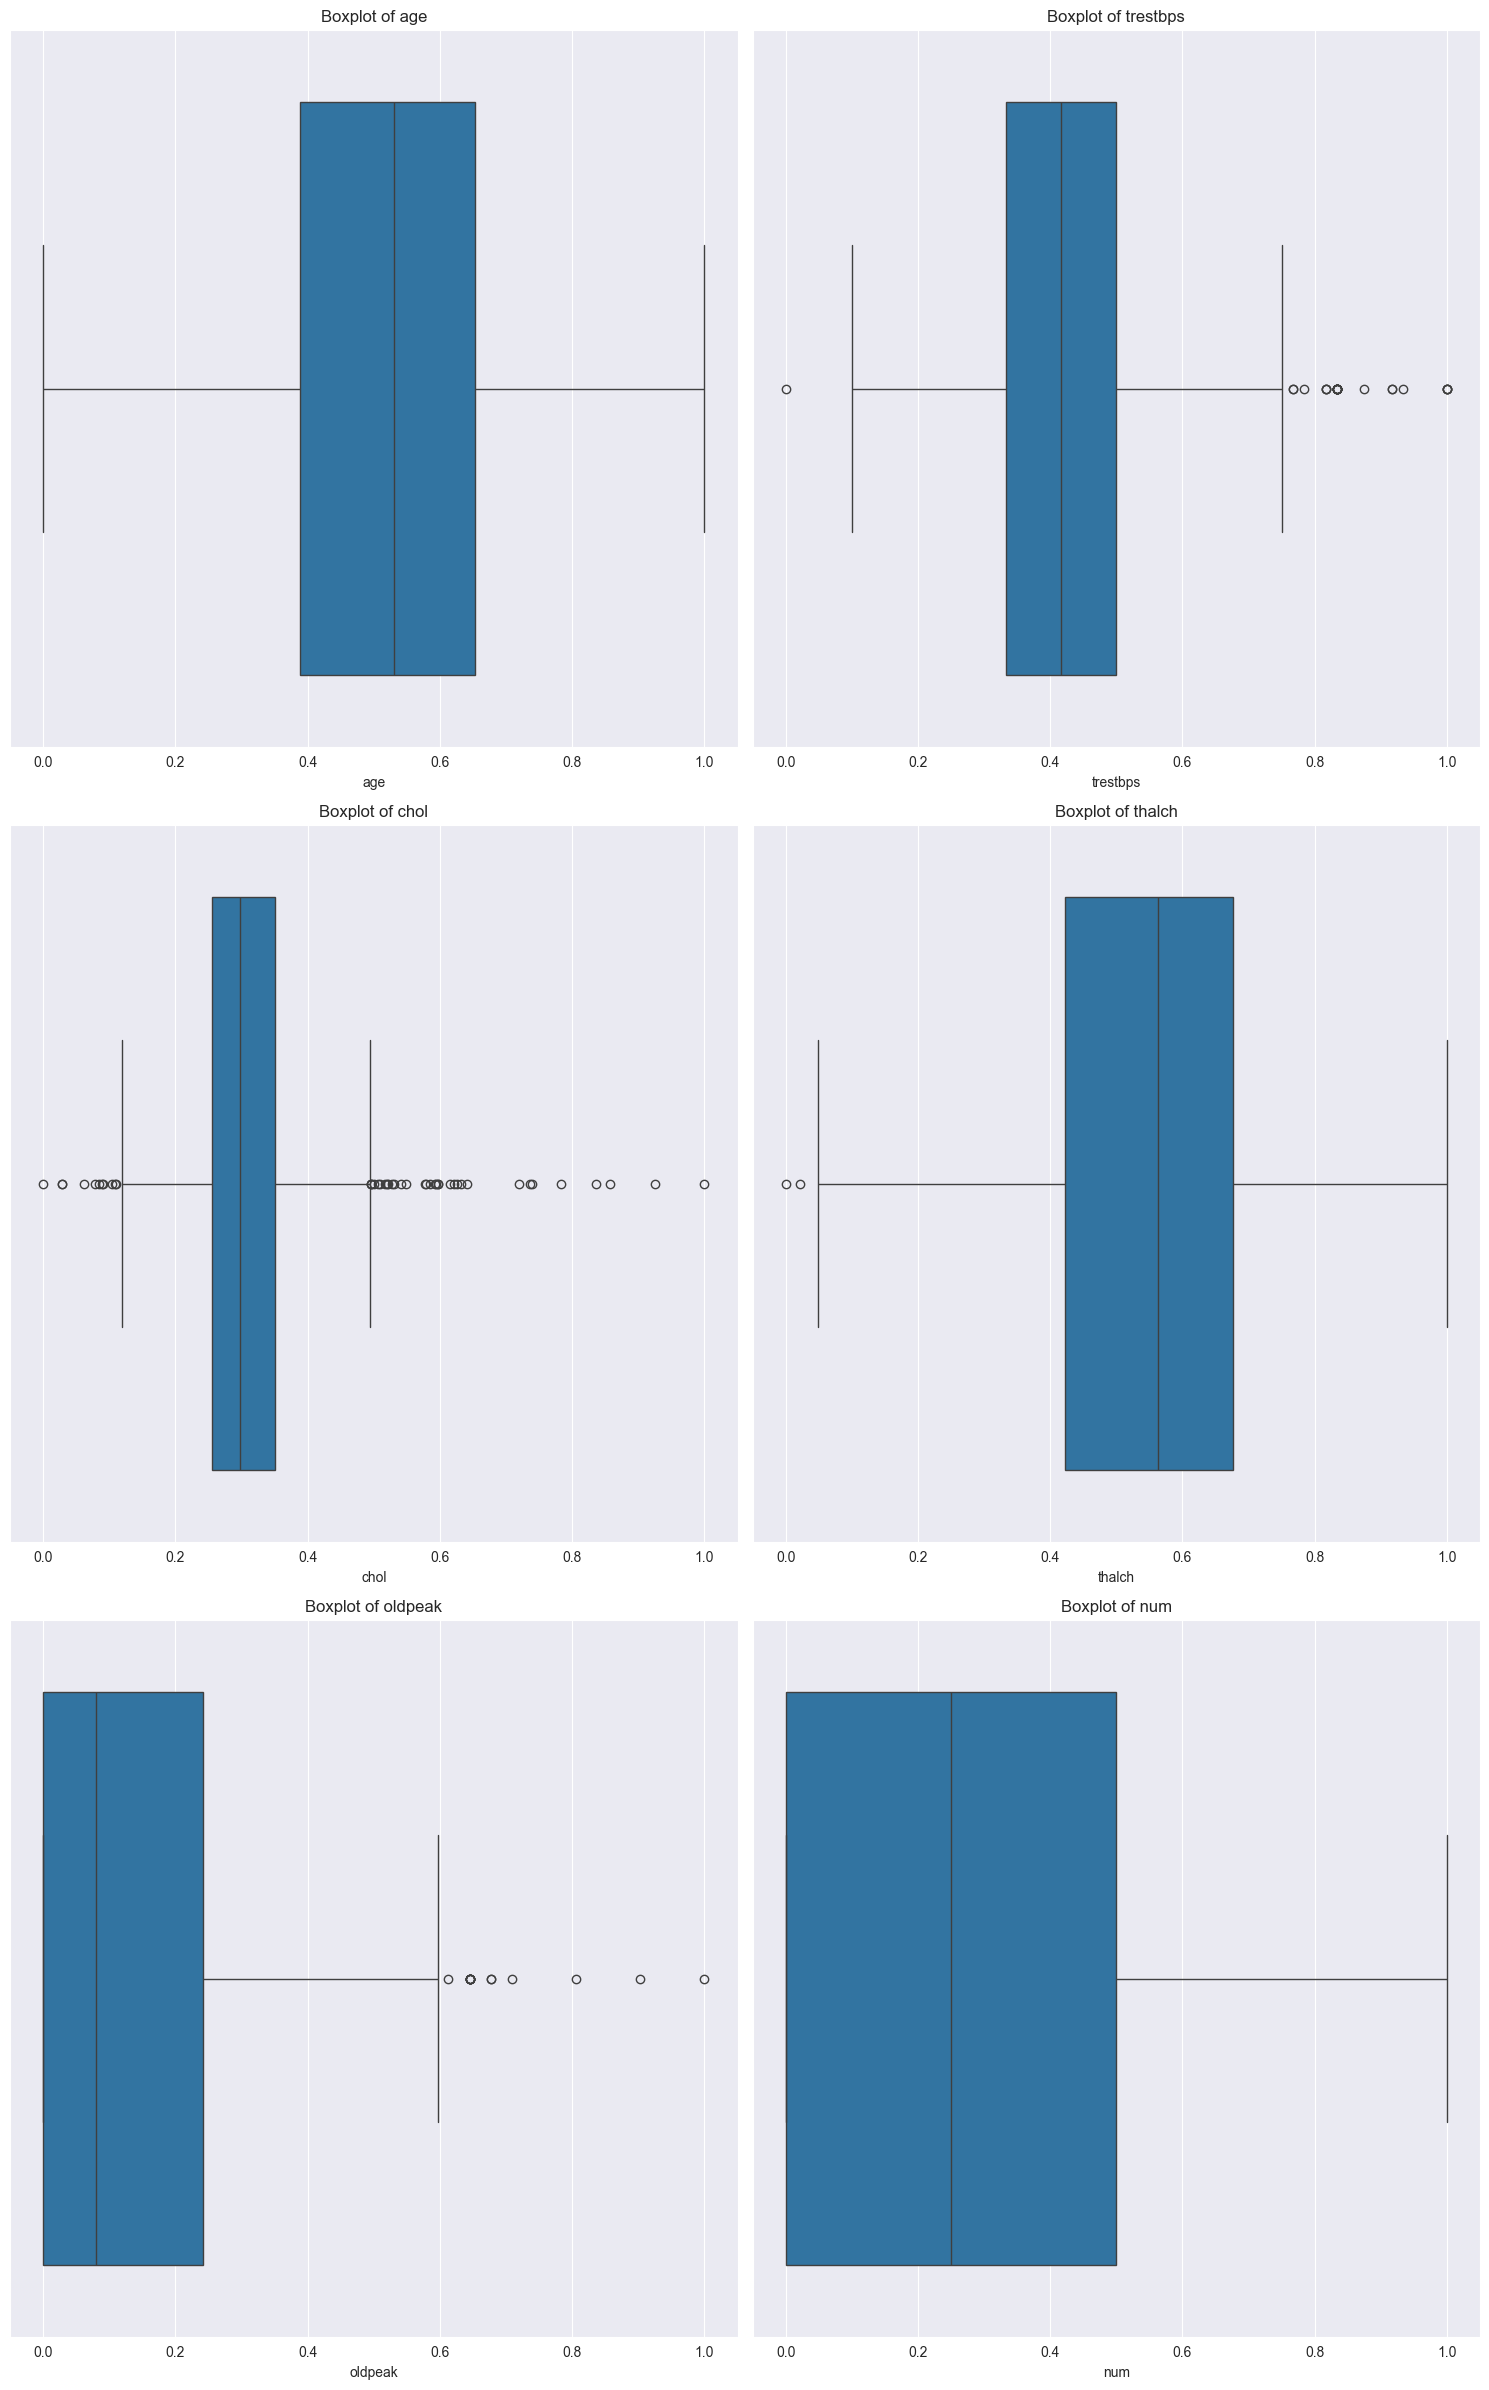

In [28]:
def plot_boxplot(df, feature, ax=None):
    # If no axis is provided, create a new plot
    if ax is None:
        plt.figure(figsize=(8, 6))
        ax = sns.boxplot(x=df[feature])
        ax.set_title(f'Boxplot of {feature}')
        plt.show()
    else:
        sns.boxplot(x=df[feature], ax=ax)
        ax.set_title(f'Boxplot of {feature}')

def plot_boxplots(df):
    features_list = numeric_columns
    num_features = len(features_list)
    if num_features % 2 == 0:
        y = num_features // 2
    else:
        y = num_features // 2 + 1
    x = 2
    fig, axes = plt.subplots(y, x, figsize=(15, 4*num_features))
    
    for i in range(y):
        for j in range(x):
            ax = axes[i, j]
            if len(features_list) > 0:
                plot_boxplot(df, features_list.pop(0), ax)
    
    plt.tight_layout()
    plt.show()
    
plot_boxplots(df)